In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv


In [2]:
data = pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv")

In [3]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


# Correlation Map

Özellikler arasındaki ilişiyi anlamamızı sağlayan parametlerden biridir. 
Eğer 2 özellik arasındaki correlation 1 ise bunlar birbiri ile doğru orantılıdır.

In [5]:
# Özellikler arasındaki correlatinı verir
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


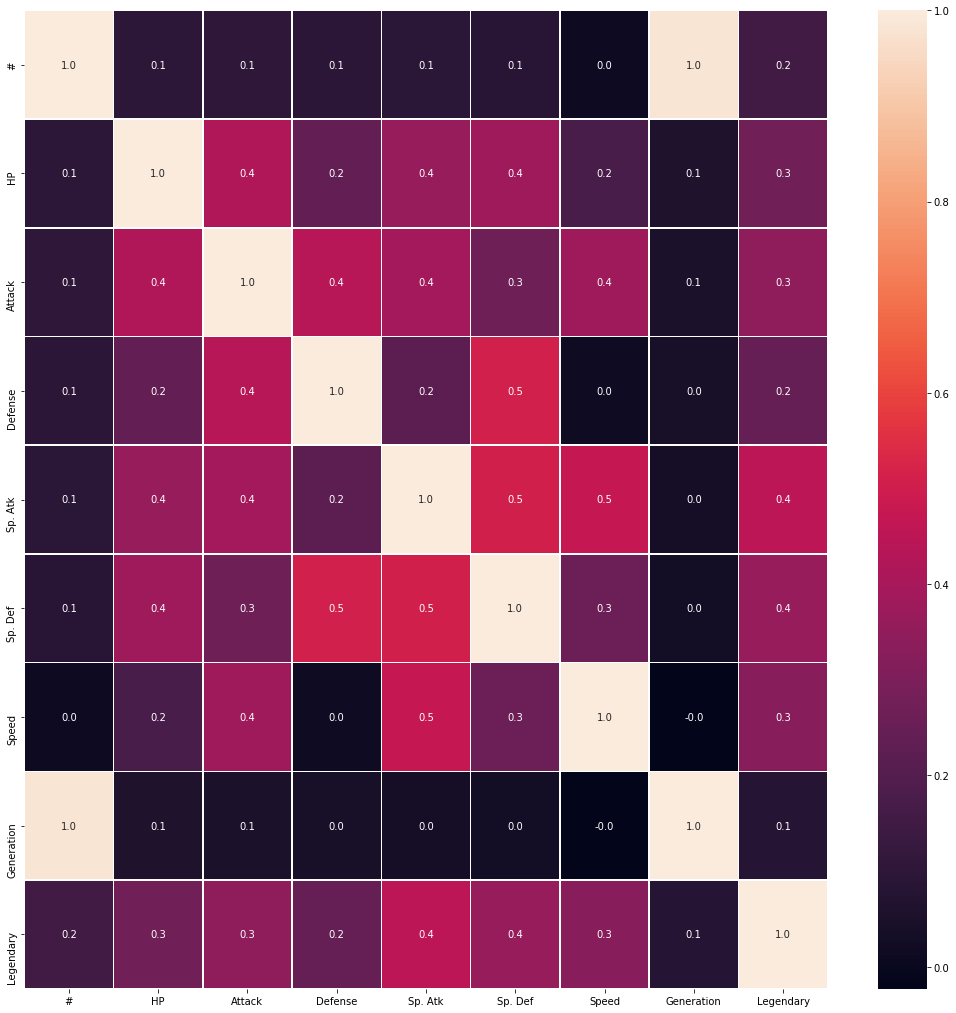

In [6]:
# annot = true : kutuların içindeki sayıların gözükmesini sağlar
# linewidths : 2 kutunun arasındaki kalınlık
# fmt = 0 dan sonra yazılacak değer - 01 gibi

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [7]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# 1. Introduction to PYTHON

## Matplotlib

* Line Plot

x axis = time ise 

* Scatter Plot 

2 özellik arasında correlation olup olmadığını anlamak istenildiğinde

* Histogram Plot 

Datanın distribution'ını anlamak istenildiğinde kullanılır. (Distribution bir featurenin sıklığı)


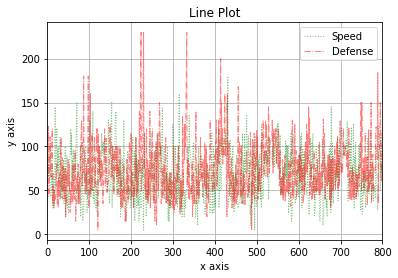

In [8]:
# datamızın columnlarından olan Speed'i al plot ettir 
# kind = line / scatter / histogram
# grid = True, grafik üzerindeki bölümlemeler

data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

## Scatter Plot

2 özellik arasında correlation'ı bulmak için 

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

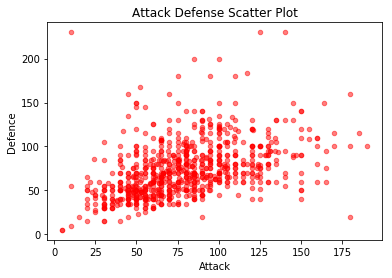

In [9]:
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

## Histogram

Data'nın distributonını (yogunlugun) görmek içiN


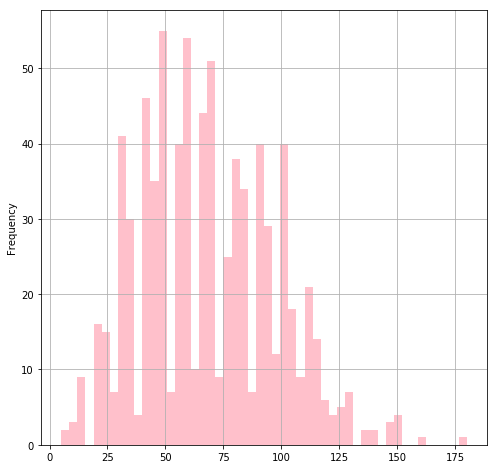

In [10]:
# bins = barların sayısı
data.Speed.plot(kind = 'hist',bins = 50,figsize = (8,8), color="pink", grid=True)
plt.show()

## CLF metodu
yapılan grafiği silmeye yarar

In [11]:
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()

<Figure size 432x288 with 0 Axes>

# Dictionary

* Küçük bir dataframe yapısı gibidir.
* İçinde 'key', 'value' yapısı vardır;
    1. dictionary = {'spain' : 'madrid'}
    1. key = spain , value=madrid
* Listeden daha hızlıdır


In [12]:
# dictionary oluşturma
dictionary = {'spain' : 'madrid' , 'usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [13]:
# dictionary elemanlarını update etme 
dictionary['spain']='barcelona'
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}


In [14]:
# eleman ekleme
dictionary['france'] = 'paris'
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}


In [15]:
# eleman silme

del dictionary['france']
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}


In [16]:
#dictionary'de eleman arama

'spain' in dictionary

True

In [17]:
# dictionary silme
dictionary.clear()

In [18]:
print(dictionary)

{}


In [19]:
# memoryde yer kalmasını istemiyorsak ;
del dictionary
print(dictionary) # olmadığı için hata verir

NameError: name 'dictionary' is not defined

# PANDAS
1. Seriler / tek boyutlu

2. DataFrameler



In [ ]:
# Dosyayı okuma
data = pd.read_csv('/kaggle/input/pokemon-challenge/pokemon.csv')

In [ ]:
series = data['Defense'] 
print(type(series))

In [ ]:
dataframe = data[['Defense']]
print(type(dataframe))

* logic, control flow, filtering.
* Comparison operator: ==, <, >, <=
* **Boolean operators:** and, or ,not
* Filtering pandas

### Filtering Pandas data frame

In [22]:
x = data['Defense']>200
x.head(3)

0    False
1    False
2    False
Name: Defense, dtype: bool

In [23]:
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [37]:
#logical_and = ikili filtelemede kullanılır
# numppy küt oldugu için np yazılır

data[np.logical_and(data['Defense']>200, data['Attack']>100)]

# 2.yol
# data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [34]:
data[np.logical_and(data['HP']<75, data['Sp. Def']>200) ]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False


## LOOPS
## While

In [38]:
i=0
while i!=5:
    print('i is:', i)
    i+=1
print(i, 'is equal to 5')

i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
5 is equal to 5


## For

In [39]:
lst = [1,2,3,4,5]
for i in lst:
    print('i is:',i)
print('')

i is: 1
i is: 2
i is: 3
i is: 4
i is: 5



In [40]:
# listenin içindeki eleman ve indexlere erişim sağlamak istenildiğinde enumerate kullanılır
for index, value in enumerate(lst):
    print(index, " :",value)
print('')

0  : 1
1  : 2
2  : 3
3  : 4
4  : 5



In [42]:
# dictinary'de kullanmak için --> dictinary.items

dictinary = {'spain':'madrid','france':'paris'}

for key,value in dictinary.items():
    print(key, ' : ', value)
print('')

spain  :  madrid
france  :  paris



In [45]:
# dosyadan okunan veriler için for
# [0:1] = -> ilk elemandan 5. elemana kadar getir demek

for index, value in data[['Attack']][0:5].iterrows():
     print(index," : ",value)

0  :  Attack    49
Name: 0, dtype: int64
1  :  Attack    62
Name: 1, dtype: int64
2  :  Attack    82
Name: 2, dtype: int64
3  :  Attack    100
Name: 3, dtype: int64
4  :  Attack    52
Name: 4, dtype: int64
